In [31]:
import pandas as pd
import numpy as np
import json
import folium

In [32]:
subway = pd.read_csv("../전국도시철도역사정보표준데이터.csv", encoding = 'euc-kr')
subway.head()

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자,제공기관코드,제공기관명
0,3122,부평삼거리,S2801,인천지하철 1호선,Bupyeongsamgeori,富平三거리,일반역,-,-,37.478267,126.710494,인천교통공사,인천광역시 부평구 경인로 765,032-516-3122,2020-11-30,B551894,인천교통공사
1,3123,간석오거리,S2801,인천지하철 1호선,Ganseogogeori,間石五거리,일반역,-,-,37.466921,126.707861,인천교통공사,인천광역시 남동구 경인로 674,032-434-3123,2020-11-30,B551894,인천교통공사
2,3124,인천시청,S2801,인천지하철 1호선,Incheon City Hall,仁川市廳,일반역,-,-,37.457615,126.702216,인천교통공사,인천광역시 남동구 예술로 264,032-441-3124,2020-11-30,B551894,인천교통공사
3,3125,예술회관,S2801,인천지하철 1호선,Arts Center,藝術會館,일반역,-,-,37.449334,126.700991,인천교통공사,인천광역시 남동구 예술로 172,032-441-3125,2020-11-30,B551894,인천교통공사
4,3126,인천터미널,S2801,인천지하철 1호선,Incheon Bus Terminal,仁川터미널,일반역,-,-,37.441917,126.699727,인천교통공사,인천광역시 미추홀구 예술로 85,032-441-3126,2020-11-30,B551894,인천교통공사


In [33]:
subway = pd.read_csv("../전국도시철도역사정보표준데이터.csv", encoding = 'euc-kr')
subway = subway[['노선명', '역사명', '역위도', '역경도', '역사도로명주소']]
subway.rename(columns={'역위도':'위도', '역경도':'경도'}, inplace=True)
subway = subway[subway['역사도로명주소'].str.contains('서울')]
subway = subway.dropna(axis=0)
subway.head()

,노선명,역사명,위도,경도,역사도로명주소
23,서울 도시철도 2호선,동대문역사문화공원,37.565003,127.007394,서울특별시 중구 을지로 지하 279 (을지로7가)
24,서울 도시철도 2호선,신당,37.565829,127.018102,서울특별시 중구 퇴계로 지하 431-1 (신당동)
25,서울 도시철도 2호선,상왕십리,37.564171,127.029352,서울특별시 성동구 왕십리로 지하 374 (하왕십리동)
26,서울 도시철도 2호선,왕십리,37.561525,127.037508,서울특별시 성동구 왕십리로 지하300(행당동)
27,서울 도시철도 2호선,한양대,37.555222,127.043492,서울특별시 성동구 왕십리로 206 (행당동)


In [34]:
seoul = (37.566, 126.9784)
m = folium.Map(location= seoul,
               zoom_start=11)

for _, row in subway.iterrows():
    folium.Circle(location = [row['위도'], row['경도']],
                  radius = 500,
                  color='#558b2f',
                  fill_color='#8bc34a',
                  popup=row['역사명'],
    ).add_to(m)

m

In [35]:
subway['구'] = subway.역사도로명주소.str.split(' ').str[1]
subway = subway[['구', '역사명', '위도', '경도']]
subway.to_csv("df_subway.csv")
subway

,구,역사명,위도,경도
23,중구,동대문역사문화공원,37.565003,127.007394
24,중구,신당,37.565829,127.018102
25,성동구,상왕십리,37.564171,127.029352
26,성동구,왕십리,37.561525,127.037508
27,성동구,한양대,37.555222,127.043492
...,...,...,...,...
989,송파구,송파나루,37.510120,127.113123
990,송파구,한성백제,37.516865,127.118185
991,송파구,올림픽공원,37.516088,127.130600
992,송파구,둔촌오륜,37.517975,127.140170


In [36]:
groups = subway.groupby('구')
groups.size()

구
강남구     31
강동구     12
강북구      3
강서구     11
관악구      4
광진구     11
구로구     13
금천구      4
노원구     16
도봉구      8
동대문구    10
동작구     13
마포구     19
서대문구     7
서초구     12
성동구     18
성북구      9
송파구     29
양천구      5
영등포구    14
용산구     17
은평구     15
종로구     15
중구      23
중랑구     13
dtype: int64

In [37]:
gu_subway = pd.DataFrame({'구':['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
                          '역 갯수':[31, 12, 3, 11, 4, 11, 13, 4, 16, 8, 10, 13, 19, 7, 12, 18, 9, 29, 5, 14, 17, 15, 15, 23, 13]})

gu_subway.to_csv("df_gu_subway.csv")
gu_subway

,구,역 갯수
0,강남구,31
1,강동구,12
2,강북구,3
3,강서구,11
4,관악구,4
5,광진구,11
6,구로구,13
7,금천구,4
8,노원구,16
9,도봉구,8


In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl

In [40]:
# deprecate 관련 경고는 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')

In [41]:
# mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')    # 설치된 폰트 확인

In [42]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'

mpl.font_manager.FontProperties(fname=fontpath)
# 한글이 안보이면 위 라인을 주석치고 실행했다가
# 다시 주석해제 후 실행

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'구별 지하철역 갯수'}>

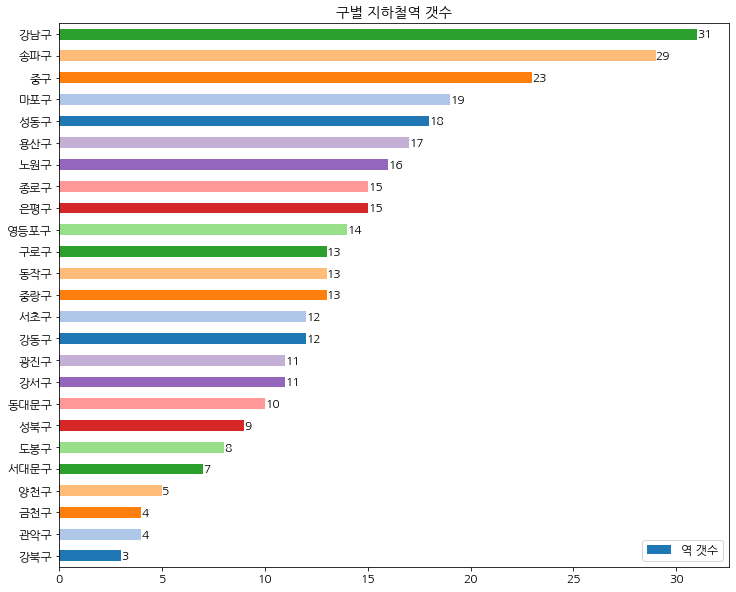

In [43]:
gu_subway = gu_subway.sort_values(by=['역 갯수'], ascending=True)
ax = gu_subway.plot.barh(figsize=(12,10), x='구', y='역 갯수', xlabel='', ylabel='역 갯수', 
                         color=plt.cm.tab20(np.arange(10)), title='구별 지하철역 갯수'
                         )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax.patches: 
    ax.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax

In [46]:
with open('../seoul_geo_simple.json', 'rt', encoding='UTF8') as f:
    seoul_geo = json.load(f)

seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [47]:
seoul_geo['features'][0]['properties']

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [48]:
gu_subway = gu_subway.groupby(['구'])['역 갯수'].sum().to_frame().reset_index()

center = [37.541, 126.986]
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=10)

folium.Choropleth(
    geo_data=seoul_geo,
    data=gu_subway, 
    columns=('구', '역 갯수'), 
    key_on='feature.properties.name',
    fill_color='BuPu',
    legend_name='역'
).add_to(m)

m

In [49]:
seoul = pd.read_excel("../Report.xls")
seoul = seoul.iloc[2:,]
seoul = seoul.rename(columns={'자치구':'지역'})
seoul

,기간,지역,면적,면적.1,동,동.1,통,반
2,2020,종로구,23.91,3.95,17,87,279,1475
3,2020,중구,9.96,1.65,15,74,253,1580
4,2020,용산구,21.87,3.61,16,36,354,2581
5,2020,성동구,16.86,2.79,17,17,467,3626
6,2020,광진구,17.06,2.82,15,7,363,2999
7,2020,동대문구,14.22,2.35,14,10,360,2633
8,2020,중랑구,18.5,3.06,16,6,550,4165
9,2020,성북구,24.58,4.06,20,39,464,3729
10,2020,강북구,23.6,3.9,13,4,389,3381
11,2020,도봉구,20.65,3.41,14,4,394,2974


In [50]:
seoul["면적"] = pd.to_numeric(seoul["면적"])

In [51]:
seoul

,기간,지역,면적,면적.1,동,동.1,통,반
2,2020,종로구,23.91,3.95,17,87,279,1475
3,2020,중구,9.96,1.65,15,74,253,1580
4,2020,용산구,21.87,3.61,16,36,354,2581
5,2020,성동구,16.86,2.79,17,17,467,3626
6,2020,광진구,17.06,2.82,15,7,363,2999
7,2020,동대문구,14.22,2.35,14,10,360,2633
8,2020,중랑구,18.50,3.06,16,6,550,4165
9,2020,성북구,24.58,4.06,20,39,464,3729
10,2020,강북구,23.60,3.9,13,4,389,3381
11,2020,도봉구,20.65,3.41,14,4,394,2974


In [52]:
gu_subway = gu_subway.rename(columns={'구':'지역'})

In [53]:
gu_subway

,지역,역 갯수
0,강남구,31
1,강동구,12
2,강북구,3
3,강서구,11
4,관악구,4
5,광진구,11
6,구로구,13
7,금천구,4
8,노원구,16
9,도봉구,8


In [54]:
seoul_subway = pd.merge(gu_subway, seoul, on='지역')
seoul_subway = seoul_subway[['지역','역 갯수','면적',]]
seoul_subway

,지역,역 갯수,면적
0,강남구,31,39.50
1,강동구,12,24.59
2,강북구,3,23.60
3,강서구,11,41.44
4,관악구,4,29.57
5,광진구,11,17.06
6,구로구,13,20.12
7,금천구,4,13.02
8,노원구,16,35.44
9,도봉구,8,20.65


In [55]:
seoul_subway["면적비율"] = seoul_subway["역 갯수"] / seoul_subway["면적"] * 100
seoul_subway

,지역,역 갯수,면적,면적비율
0,강남구,31,39.50,78.481013
1,강동구,12,24.59,48.800325
2,강북구,3,23.60,12.711864
3,강서구,11,41.44,26.544402
4,관악구,4,29.57,13.527224
5,광진구,11,17.06,64.478312
6,구로구,13,20.12,64.612326
7,금천구,4,13.02,30.721966
8,노원구,16,35.44,45.146727
9,도봉구,8,20.65,38.740920


In [57]:
seoul_subway.rename(columns={'지역':'구', '역 갯수':'역갯수', '면적':'구면적',}, inplace=True)
gu_subway = seoul_subway
gu_subway["면적비율"] = round(gu_subway["면적비율"], 2)
gu_subway.to_csv("../df_gu_subway.csv", index=None)
gu_subway

,구,역갯수,구면적,면적비율
0,강남구,31,39.50,78.48
1,강동구,12,24.59,48.80
2,강북구,3,23.60,12.71
3,강서구,11,41.44,26.54
4,관악구,4,29.57,13.53
5,광진구,11,17.06,64.48
6,구로구,13,20.12,64.61
7,금천구,4,13.02,30.72
8,노원구,16,35.44,45.15
9,도봉구,8,20.65,38.74


<AxesSubplot:title={'center':'구별 지하철 면적비율'}>

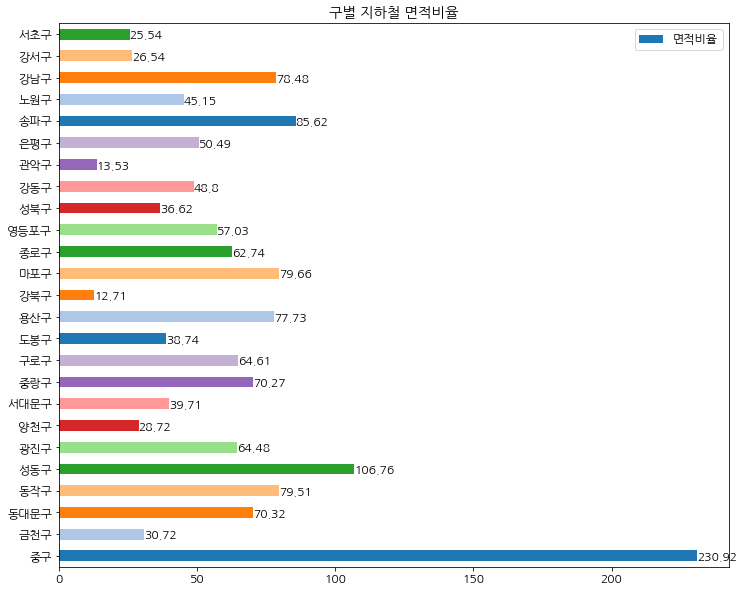

In [29]:
# 구별 공원면적

subway = gu_subway.sort_values(by=['구면적'], ascending=True)
ax1 = subway.plot.barh(figsize=(12,10), x='구', y='면적비율', xlabel='', ylabel='면적비율', 
                     color=plt.cm.tab20(np.arange(10)), title='구별 지하철 면적비율'
                     )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax1.patches: 
    ax1.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax1